In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
movie_metadata = "data/final_df.csv"

# Read the data
movie_metadata = pd.read_csv(movie_metadata)

movie_metadata

,Unnamed: 0,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,9,tt0000009,Miss Jerry,1894,45,Romance,5.3,89
1,412,tt0000574,The Story of the Kelly Gang,1906,70,"Biography,Crime,Drama",6.1,562
2,481,tt0000679,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",4.8,34
3,781,tt0001184,Don Juan de Serrallonga,1910,58,"Adventure,Drama",3.1,11
4,813,tt0001258,The White Slave Trade,1910,45,Drama,5.7,79
...,...,...,...,...,...,...,...,...
100250,474785,tt0953564,A Footstep on Sand,1988,101,"Drama,History,Thriller",6.6,11
100251,474790,tt0953605,Sukran,2005,165,"Action,Drama",3.2,442
100252,474798,tt0953659,A Suitcaseful of Sex,1971,93,Comedy,5.4,22
100253,474868,tt0953903,Year 1863,1922,93,"Drama,History,Romance",6.4,15


In [2]:
#Selecting only relevant columns 
ranking_df = movie_metadata.loc[:, ["genres", "startYear","averageRating"]]
ranking_df

,genres,startYear,averageRating
0,Romance,1894,5.3
1,"Biography,Crime,Drama",1906,6.1
2,"Adventure,Fantasy",1908,4.8
3,"Adventure,Drama",1910,3.1
4,Drama,1910,5.7
...,...,...,...
100250,"Drama,History,Thriller",1988,6.6
100251,"Action,Drama",2005,3.2
100252,Comedy,1971,5.4
100253,"Drama,History,Romance",1922,6.4


In [3]:
#Creating bins 
bins = [1970,1980,1990,2000,2010]
year_groups = ["1970-1980","1980-1990","1990-2000","2000-2010"]

ranking_df["Year group"] = pd.cut(ranking_df["startYear"],bins,labels=year_groups)
ranking_df.dropna()

,genres,startYear,averageRating,Year group
9811,"Comedy,Fantasy,Romance",2001,6.4,2000-2010
10463,"Drama,War",1983,6.5,1980-1990
12060,Drama,1973,6.2,1970-1980
20727,Horror,1971,3.5,1970-1980
23235,"Comedy,Musical",1973,7.0,1970-1980
...,...,...,...,...
100248,"Animation,Family",2006,6.3,2000-2010
100249,Documentary,2007,7.4,2000-2010
100250,"Drama,History,Thriller",1988,6.6,1980-1990
100251,"Action,Drama",2005,3.2,2000-2010


In [20]:
year_genres_ct = ranking_df.groupby("Year group")["genres"].value_counts()
genres_df = pd.DataFrame({"Genre Count":year_genres_ct})

In [23]:
genre_metadata = year_genres_ct.reset_index(name = "Genre Count")
genre_metadata

,Year group,genres,Genre Count
0,1970-1980,Drama,2541
1,1970-1980,Comedy,1700
2,1970-1980,Documentary,456
3,1970-1980,"Drama,Romance",427
4,1970-1980,"Comedy,Drama",397
...,...,...,...
2079,2000-2010,"Musical,Sci-Fi,Thriller",1
2080,2000-2010,"Musical,War",1
2081,2000-2010,"Mystery,Romance,Sci-Fi",1
2082,2000-2010,"Romance,Sci-Fi,Thriller",1


In [24]:
yg1970 = genre_metadata.loc[genre_metadata["Year group"] =="1970-1980"]
yg1970_sorted = yg1970.sort_values(by=["Genre Count"],ascending = False)
yg1970_top3 = yg1970_sorted.iloc[0:3]
yg1970_top3

,Year group,genres,Genre Count
0,1970-1980,Drama,2541
1,1970-1980,Comedy,1700
2,1970-1980,Documentary,456


In [25]:
yg1980 = genre_metadata.loc[genre_metadata["Year group"] =="1980-1990"]
yg1980_sorted = yg1980.sort_values(by=["Genre Count"],ascending = False)
yg1980_top3 = yg1980_sorted.iloc[0:3]
yg1980_top3

,Year group,genres,Genre Count
502,1980-1990,Drama,2951
503,1980-1990,Comedy,1649
504,1980-1990,Documentary,566


In [26]:
yg1990 = genre_metadata.loc[genre_metadata["Year group"] =="1990-2000"]
yg1990_sorted = yg1990.sort_values(by=["Genre Count"],ascending = False)
yg1990_top3 = yg1990_sorted.iloc[0:3]
yg1990_top3

,Year group,genres,Genre Count
1016,1990-2000,Drama,3009
1017,1990-2000,Comedy,1542
1018,1990-2000,Documentary,1250


In [27]:
yg2000 = genre_metadata.loc[genre_metadata["Year group"] =="2000-2010"]
yg2000_sorted = yg2000.sort_values(by=["Genre Count"],ascending = False)
yg2000_top3 = yg2000_sorted.iloc[0:3]
yg2000_top3

,Year group,genres,Genre Count
1543,2000-2010,Drama,3523
1544,2000-2010,Documentary,2456
1545,2000-2010,Comedy,1539


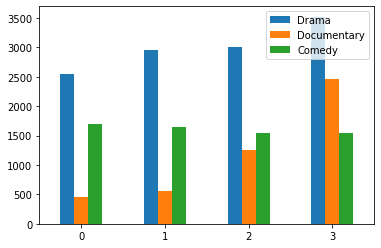

In [28]:
Drama = [2541,2951,3009,3523]
Documentary = [456, 566,1250,2456]
Comedy = [1700,1649,1542,1539]

df = pd.DataFrame({"Drama": Drama, "Documentary": Documentary, "Comedy": Comedy})

ax = df.plot.bar(rot=0)

In [29]:
year_genres_ranking = ranking_df.groupby(["Year group","genres"])["averageRating"].mean()
year_genres_ranking

Year group  genres                    
1970-1980   Action                        5.857143
            Action,Adventure              5.644318
            Action,Adventure,Animation    6.928571
            Action,Adventure,Biography    5.940000
            Action,Adventure,Comedy       5.571930
                                            ...   
2000-2010   Thriller,War                  6.500000
            Thriller,Western              4.200000
            War                           6.816667
            War,Western                        NaN
            Western                       4.956250
Name: averageRating, Length: 3744, dtype: float64

In [61]:
avgranking_genre = pd.DataFrame({"Average Ranking": year_genres_ranking})
generating_df = avgranking_genre.reset_index()
generating_df 

,Year group,genres,Average Ranking
0,1970-1980,Action,5.857143
1,1970-1980,"Action,Adventure",5.644318
2,1970-1980,"Action,Adventure,Animation",6.928571
3,1970-1980,"Action,Adventure,Biography",5.940000
4,1970-1980,"Action,Adventure,Comedy",5.571930
...,...,...,...
3739,2000-2010,"Thriller,War",6.500000
3740,2000-2010,"Thriller,Western",4.200000
3741,2000-2010,War,6.816667
3742,2000-2010,"War,Western",NaN


In [32]:
#1970 ratings 
yg1970_doc = genrating_df.loc[(genrating_df["Year group"] =="1970-1980") & (genrating_df["genres"] == "Documentary")]
yg1970_doc_rating = round(yg1970_doc["Average Ranking"],2)

yg1970_com = genrating_df.loc[(genrating_df["Year group"] =="1970-1980") & (genrating_df["genres"] == "Comedy")]
yg1970_com_rating = round(yg1970_com["Average Ranking"],2)
                              
yg1970_dra = genrating_df.loc[(genrating_df["Year group"] =="1970-1980") & (genrating_df["genres"] == "Drama")]
yg1970_dra_rating = round(yg1970_dra["Average Ranking"],2)

In [33]:
#1980 ratings 
yg1980_doc = genrating_df.loc[(genrating_df["Year group"] =="1980-1990") & (genrating_df["genres"] == "Documentary")]
yg1980_doc_rating = round(yg1980_doc["Average Ranking"],2)

yg1980_com = genrating_df.loc[(genrating_df["Year group"] =="1980-1990") & (genrating_df["genres"] == "Comedy")]
yg1980_com_rating = round(yg1980_com["Average Ranking"],2)
                              
yg1980_dra = genrating_df.loc[(genrating_df["Year group"] =="1980-1990") & (genrating_df["genres"] == "Drama")]
yg1980_dra_rating = round(yg1980_dra["Average Ranking"],2)

In [34]:
#1990 ratings 
yg1990_doc = genrating_df.loc[(genrating_df["Year group"] =="1990-2000") & (genrating_df["genres"] == "Documentary")]
yg1990_doc_rating = round(yg1990_doc["Average Ranking"],2)

yg1990_com = genrating_df.loc[(genrating_df["Year group"] =="1990-2000") & (genrating_df["genres"] == "Comedy")]
yg1990_com_rating = round(yg1990_com["Average Ranking"],2)
                              
yg1990_dra = genrating_df.loc[(genrating_df["Year group"] =="1990-2000") & (genrating_df["genres"] == "Drama")]
yg1990_dra_rating = round(yg1990_dra["Average Ranking"],2)

In [48]:
#2000 ratings 
yg2000_doc = genrating_df.loc[(genrating_df["Year group"] =="2000-2010") & (genrating_df["genres"] == "Documentary")]
yg2000_doc_rating = round(yg2000_doc["Average Ranking"],2)

yg2000_com = genrating_df.loc[(genrating_df["Year group"] =="2000-2010") & (genrating_df["genres"] == "Comedy")]
yg2000_com_rating = round(yg2000_com["Average Ranking"],2)
                              
yg2000_dra = genrating_df.loc[(genrating_df["Year group"] =="2000-2010") & (genrating_df["genres"] == "Drama")]
yg2000_dra_rating = round(yg2000_dra["Average Ranking"],2)




6.36

In [53]:
yrs = ["1970-1980","1980-1990","1990-2000","2000-2010"]
dra_rating = [yg1970_dra_rating.iloc[0],yg1980_dra_rating.iloc[0],yg1990_dra_rating.iloc[0],yg2000_dra_rating.iloc[0]]
doc_rating = [yg1970_doc_rating.iloc[0],yg1980_doc_rating.iloc[0],yg1990_doc_rating.iloc[0],yg2000_doc_rating.iloc[0]]
com_rating = [yg1970_com_rating.iloc[0],yg1980_com_rating.iloc[0],yg1990_com_rating.iloc[0],yg2000_com_rating.iloc[0]]

df = pd.DataFrame({"Years": yrs, "Drama": dra_rating, "Documentary": doc_rating, "Comedy": com_rating})
df

,Years,Drama,Documentary,Comedy
0,1970-1980,6.33,6.91,5.45
1,1980-1990,6.34,7.19,5.60
2,1990-2000,6.33,7.08,5.63
3,2000-2010,6.36,7.28,5.77


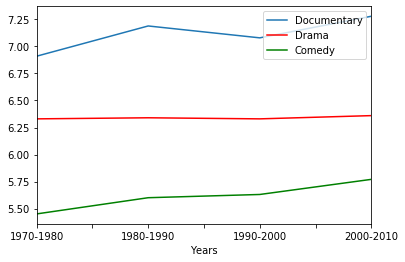

In [60]:
ax = plt.gca()

df.plot(kind='line',x='Years',y='Documentary', ax=ax)
df.plot(kind='line',x='Years',y='Drama', color="red", ax=ax)
df.plot(kind='line',x='Years',y='Comedy', color="green", ax=ax)

#df.plot(kind='line',x='yrs',y='num_pets', color='red', ax=ax)